In [1]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider
from mlp.penalties import L1Penalty, L2Penalty
import logging
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(model, error, learning_rule, train_data, valid_data,
                                num_epochs, stats_interval, notebook=True, plots=False):
    
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}
    optimiser = Optimiser(model, error, learning_rule, train_data,
                          valid_data, data_monitors, notebook=notebook)

    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    if plots:
        fig_1 = plt.figure(figsize=(8, 4))
        ax_1 = fig_1.add_subplot(111)
        for k in ['error(train)', 'error(valid)']:
            ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                    stats[1:, keys[k]], label=k)
        ax_1.legend(loc=0)
        ax_1.set_xlabel('Epoch number')
        ax_1.set_ylabel('Error')
        fig_2 = plt.figure(figsize=(8, 4))
        ax_2 = fig_2.add_subplot(111)
        for k in ['acc(train)', 'acc(valid)']:
            ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                    stats[1:, keys[k]], label=k)
        ax_2.legend(loc=0)
        ax_2.set_xlabel('Epoch number')
        ax_2.set_xlabel('Accuracy')
        return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2
    else:
        return stats, keys, run_time

def get_logger (filename = 'logs.log'):
    logger = logging.getLogger()
    logger.setLevel(logging.INFO)
    formatter = logging.Formatter('%(asctime)s | %(levelname)s | %(message)s')
    # logger.handlers = [logging.StreamHandler()]
    # create file handler which logs even debug messages
    fh = logging.FileHandler(filename)
    fh.setLevel(logging.DEBUG)
    fh.setFormatter(formatter)
    logger.addHandler(fh)
    return logger

def get_pre_defined_params ():
    seed = 11102019 
    rng = np.random.RandomState(seed)
    batch_size = 100
    logger = get_logger()
    train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
    valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
    learning_rate = 0.0001
    num_epochs = 20
    stats_interval = 1
    input_dim, output_dim, hidden_dim = 784, 47, 128
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)  
    return rng, batch_size, train_data, valid_data, learning_rate, stats_interval , input_dim, output_dim, hidden_dim, weights_init, biases_init


rng, batch_size, train_data, valid_data, learning_rate, stats_interval , input_dim,\
     output_dim, hidden_dim, weights_init, biases_init = get_pre_defined_params()
logger = get_logger()
error = CrossEntropySoftmaxError()
learning_rule = AdamLearningRule(learning_rate=learning_rate)


KeysView(<numpy.lib.npyio.NpzFile object at 0x00000214F18F2100>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x00000214F18F2400>)


In [2]:

results_dict = {}
setups = [
    (None, None, DropoutLayer(0.7)),
    (L1Penalty(1e-3), None, DropoutLayer(1)),
    (None, L2Penalty(1e-3), DropoutLayer(0.7)),
]
num_epochs = 2

filename = f'Task2_using_{num_epochs}_epoch_{learning_rate}_LR.npy'


for l1,l2,do in setups:
    
    l = None
    if l1 is not None:
        l = l1
    if l2 is not None:
        l = l2
    
    train_data.reset()  
    valid_data.reset()  
    result_key = f'l_{l}-l1_{l1}-l2_{l2}-dropout_{do}-epochs_{num_epochs}-lr_{learning_rate}'
    Logger = get_logger(result_key)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty= l, biases_penalty= l), # first hidden layer
        ReluLayer(),
        do,
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty= l, biases_penalty= l), # second hidden layer
        ReluLayer(),
        do,
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty= l, biases_penalty= l), # Third hidden layer
        ReluLayer(),
        do,
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty= l, biases_penalty= l) # output layer
    ])
    
    r= train_model_and_plot_stats(
            model, error, learning_rule, train_data,
            valid_data, num_epochs, stats_interval, notebook=True, plots=True)

    results_dict[result_key] = r

np.save(filename, results_dict) 


0.001

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

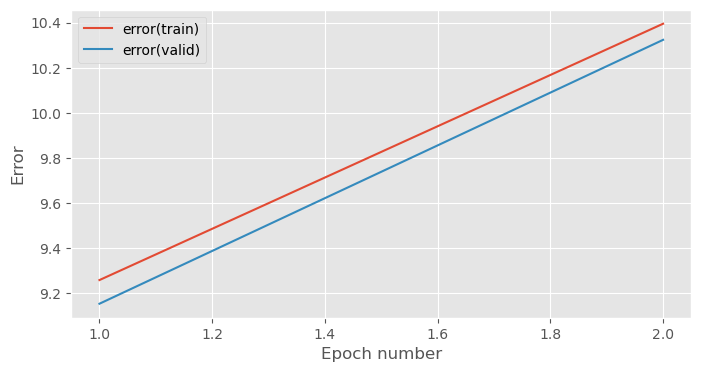

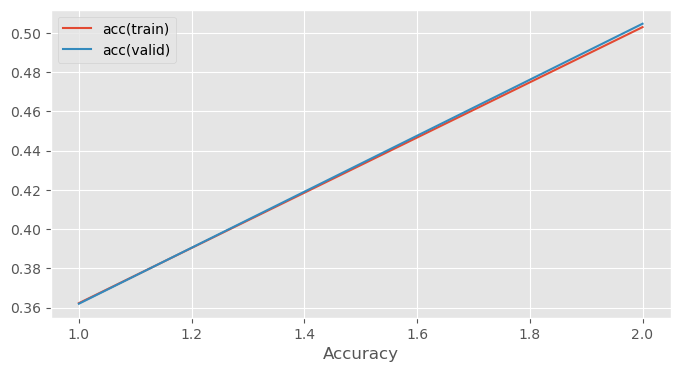

In [4]:
results_dict

{'l1_None-l2_None-dropout_DropoutLayer(incl_prob=0.6)-epochs_2-lr_0.0001': (array([[ 4.52605469,  0.02114   ,  4.53675787,  0.02082278],
         [ 9.25906354,  0.36232   ,  9.15419369,  0.36202532],
         [10.39513927,  0.50295   , 10.32371897,  0.50468354]]),
  {'error(train)': 0, 'acc(train)': 1, 'error(valid)': 2, 'acc(valid)': 3},
  16.03562593460083,
  <Figure size 800x400 with 1 Axes>,
  <AxesSubplot:xlabel='Epoch number', ylabel='Error'>,
  <Figure size 800x400 with 1 Axes>,
  <AxesSubplot:xlabel='Accuracy'>)}

In [ ]:
num_epochs = 100
train_data.reset()  
valid_data.reset()  
l1 = None #L1Penalty(0)
l2 = None #L2Penalty(0)
do = DropoutLayer(incl_prob= 0.97)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty= l2, biases_penalty= l2), # first hidden layer
    ReluLayer(),
    do,
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty= l2, biases_penalty= l2), # second hidden layer
    ReluLayer(),
    do,
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty= l2, biases_penalty= l2), # Third hidden layer
    ReluLayer(),
    do,
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty= l2, biases_penalty= l2) # output layer
])
_= train_model_and_plot_stats(
        model, error, learning_rule, train_data,
        valid_data, num_epochs, stats_interval, notebook=True, plots=True)

In [8]:
np.load('my_file.npy', allow_pickle=True)

array({'l1_None-l2_None-dropout_DropoutLayer(incl_prob=0.6)-epochs_2-lr_0.0001': (array([[ 4.52605469,  0.02114   ,  4.53675787,  0.02082278],
       [ 9.25906354,  0.36232   ,  9.15419369,  0.36202532],
       [10.39513927,  0.50295   , 10.32371897,  0.50468354]]), {'error(train)': 0, 'acc(train)': 1, 'error(valid)': 2, 'acc(valid)': 3}, 16.03562593460083, <Figure size 800x400 with 1 Axes>, <AxesSubplot:xlabel='Epoch number', ylabel='Error'>, <Figure size 800x400 with 1 Axes>, <AxesSubplot:xlabel='Accuracy'>)},
      dtype=object)

In [ ]:
# num_epochs = 15
# train_data.reset()  
# valid_data.reset()  
# l1 = L1Penalty(0.5)
# l2 = L2Penalty(0.5)
# do = DropoutLayer(incl_prob= 0.5)
# model = MultipleLayerModel([
#     AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # first hidden layer
#     ReluLayer(),
#     do,
#     AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # second hidden layer
#     ReluLayer(),
#     do,
#     AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # Third hidden layer
#     ReluLayer(),
#     do,
#     AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
# ])
# _= train_model_and_plot_stats(
#         model, error, learning_rule, train_data,
#         valid_data, num_epochs, stats_interval, notebook=True, plots=True)

In [ ]:
num_epochs = 15
train_data.reset()  
valid_data.reset()  
l1 = L1Penalty(0.001)
l2 = L2Penalty(0.001)
do = DropoutLayer(incl_prob= 1)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty= l1, biases_penalty= l1), # first hidden layer
    ReluLayer(),
    do,
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty= l1, biases_penalty= l1), # second hidden layer
    ReluLayer(),
    do,
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty= l1, biases_penalty= l1), # Third hidden layer
    ReluLayer(),
    do,
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty= l1, biases_penalty= l1) # output layer
])
_= train_model_and_plot_stats(
        model, error, learning_rule, train_data,
        valid_data, num_epochs, stats_interval, notebook=True, plots=True)

In [ ]:
num_epochs = 15
train_data.reset()  
valid_data.reset()  
l1 = L1Penalty(0.001)
l2 = L2Penalty(0.001)
do = DropoutLayer(incl_prob= 1)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty= l2, biases_penalty= l2), # first hidden layer
    ReluLayer(),
    do,
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty= l2, biases_penalty= l2), # second hidden layer
    ReluLayer(),
    do,
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty= l2, biases_penalty= l2), # Third hidden layer
    ReluLayer(),
    do,
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty= l2, biases_penalty= l2) # output layer
])
_= train_model_and_plot_stats(
        model, error, learning_rule, train_data,
        valid_data, num_epochs, stats_interval, notebook=True, plots=True)

In [ ]:
seed = 11102019 
rng = np.random.RandomState(seed)
batch_size = 100
logger = get_logger()
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
learning_rate = 0.001
num_epochs = 20
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
exp2_res = []
net_depth = [1,2,3]
train_data.reset()  
valid_data.reset()  
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)  
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # first hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # second hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # second hidden layer
    ReluLayer(),
    # DropoutLayer(rng = rng, incl_prob=0.5),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
])
error = CrossEntropySoftmaxError()
learning_rule = AdamLearningRule(learning_rate=learning_rate)
# stats, keys, _ = train_model_and_plot_stats(
#         model, error, learning_rule, train_data,
#         valid_data, num_epochs, stats_interval, notebook=True, plots=False)
_= train_model_and_plot_stats(
        model, error, learning_rule, train_data,
        valid_data, num_epochs, stats_interval, notebook=True, plots=True)
exp2_res.append(stats)









In [ ]:
seed = 11102019 
rng = np.random.RandomState(seed)
batch_size = 100
logger = get_logger()
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
learning_rate = 0.001
num_epochs = 10
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
exp2_res = []
net_depth = [1,2,3]
train_data.reset()  
valid_data.reset()  
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)  
l1 = L1Penalty(0.1)
l2 = L2Penalty(0.1)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init,
     weights_penalty=None, biases_penalty=None),
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,
     weights_penalty=None, biases_penalty=None), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,
     weights_penalty=l1, biases_penalty=l1),
    ReluLayer(),
    # DropoutLayer(rng = rng, incl_prob=0.5),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
])
error = CrossEntropySoftmaxError()
learning_rule = AdamLearningRule(learning_rate=learning_rate)
# stats, keys, _ = train_model_and_plot_stats(
#         model, error, learning_rule, train_data,
#         valid_data, num_epochs, stats_interval, notebook=True, plots=False)
_= train_model_and_plot_stats(
        model, error, learning_rule, train_data,
        valid_data, num_epochs, stats_interval, notebook=True, plots=True)
exp2_res.append(stats)







